In [1]:
# import libs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# Display plots in line

In [2]:
#load data to variables

data = np.load('regression.npz') 
print(list(data)) # prints the names of all elements in `data`
train_x = data['train_x']
train_y = data['train_y']
test_x = data['test_x']
test_y = data['test_y']
num_trainPoints = train_x.size
num_testPoints = test_x.size


['test_y', 'test_x', 'train_y', 'train_x']


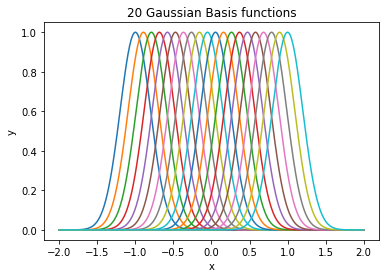

In [3]:
#1. Generate and plot 20 Gaussian basis functions
num_basisFunc = 20 #Number of basis functions
mean = np.linspace(-1,1,num_basisFunc) #means equally spaced between -1 and 1
std = 0.2 #standard deviation

x = np.linspace(-2,2,1000)
for i in range(mean.size):
    y = np.exp(-0.5*(np.square(x-mean[i])/np.square(std)))
    plt.plot(x,y)

plt.title(str(num_basisFunc)+ ' Gaussian Basis functions')
plt.ylabel('y')
plt.xlabel('x')
plt.show()


In [4]:
#2. compute least-squares optimal regression weights

reg_val = 0.1 #Regularization value (lambda)
phi_matrix = np.matrix(np.zeros((num_trainPoints, num_basisFunc))) #matrix phi which is the value of each basis func, for each input feat x
I_matrix = np.identity(num_basisFunc) #Identity matrix
t = np.transpose(np.matrix(train_y)) #training target values

for i in range(num_basisFunc): #populate phi matrix
    y = np.matrix(np.exp(-0.5*(np.square(train_x-mean[i])/np.square(std))))
    phi_matrix[:,i]=np.transpose(y)
  
#In the form Ax=B, where x is w weights, A is lambda*I+phiT*phi, B is phiT*t
A = reg_val*I_matrix + np.matmul(np.transpose(phi_matrix), phi_matrix)
B = np.matmul(np.transpose(phi_matrix), t)
w = np.linalg.solve(A, B)

print('Least-squares optimal regression weights, w:' + str(w))

Least-squares optimal regression weights, w:[[ 0.32531193]
 [ 0.65400069]
 [ 0.3364167 ]
 [-0.3260816 ]
 [-0.40448416]
 [ 0.24415624]
 [ 0.61520226]
 [ 0.07926471]
 [-0.58481295]
 [-0.35893667]
 [ 0.41511744]
 [ 0.5340327 ]
 [-0.16518323]
 [-0.5351314 ]
 [ 0.01864438]
 [ 0.5898299 ]
 [ 0.3021546 ]
 [-0.26484593]
 [-0.08818848]
 [ 0.69851647]]


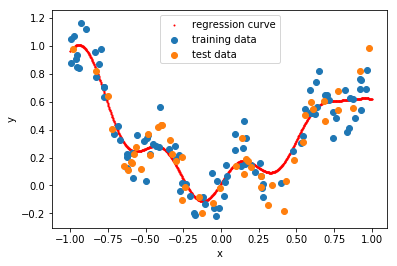

Root mean square error for training data: [[0.11771875]]
Root mean square error for test data: [[0.12193286]]


In [5]:
#3. Plotting 
#Calculating the regression curve
plt.figure(2)
x = np.array(np.linspace(-1,1,1000))
reg_curve = np.array(np.zeros(1000))

for i in range(1000):
    y = np.matrix(np.exp(-0.5*(np.square(x[i]-mean)/np.square(std))))
    reg_curve[i] = np.array(np.dot(y,w))

plt.scatter(x, reg_curve, 1, c='r')    
plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y)
plt.legend(('regression curve', 'training data', 'test data'))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#Finding root mean square error
RMSE = 0
for i in range(num_trainPoints):
    y = np.exp(-0.5*(np.square(train_x[i]- mean)/np.square(std)))
    y = np.dot(y,w)
    RMSE = RMSE + np.square(train_y[i]-y)
RMSE = np.sqrt(RMSE/num_trainPoints)
print('Root mean square error for training data: ' + str(RMSE))

RMSE = 0
for i in range(num_testPoints):
    y = np.exp(-0.5*(np.square(test_x[i]- mean)/np.square(std)))
    y = np.dot(y,w)
    RMSE = RMSE + np.square(test_y[i]-y)
RMSE = np.sqrt(RMSE/num_testPoints)
print('Root mean square error for test data: ' + str(RMSE))
